In [1]:
import pandas as pd
import numpy as np
import requests
import altair as alt
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
renderer = 'default' 
scenario = 0
alt.renderers.enable(renderer)
alt.renderers.enable('default')
alt.renderers.enable('mimetype')

filename = "uga-football-roster.html"

In [ ]:
names = {}
for name in data['Name']:
    ln = name.split(' ')[1]
    if ln in names.keys():
        names[ln].append(name)
    else:
        names[ln] = [name]
names = [tuple(v) for v in names.values() if len(v) > 1]
names = sorted(sorted(names, key=lambda x: x[0].split(' ')[1]), key=lambda x: len(x), reverse=True)
test_6 = names
test_6

In [2]:
#read the html file, UGA Football Roster
# 'r' is the default value, opens file for reading
text = open(filename, 'r').read() 

#check response status
url = 'https://www.sicemdawgs.com/uga-football-roster'
response_status = requests.get(url)
response_status

#find tag name 'table' to scrape the roster table from the html 
table = BeautifulSoup(text).find(lambda tag: tag.name=='table')

#pulls all trs from table body
all_trs =  table.tbody.find_all('tr')

#pulls all tds from all trs
all_tds = [tr.find_all('td') for tr in all_trs]

#returns all text from tds, each row is a list of strings
rows = [[td.text for td in row] for row in all_tds]

#returns all th from thead 
all_ths = table.thead.find_all('th')

#returns all text from ths as one list of strings/headers
cols = [th.text for th in all_ths]

In [3]:
#Creates a Data Frame with cols and rows, check # of cols and rows
data = pd.DataFrame(data=rows, columns=cols)
data.shape



(127, 7)

In [4]:
#Change column names, set index to be Number column
#jersey number should be unique, but we will check later!
data.columns = ['Number', 'Name', 'Position', 'Class', 'Height', 'Weight', 'Home']
data.set_index('Number')

,Name,Position,Class,Height,Weight,Home
Number,,,,,,
0,Rian Davis,ILB,Jr.,6-2,230,"Apopka, FL (Wekiva)"
0,Darnell Washington,TE,Jr.,6-7,265,"Las Vegas, NV (Desert Pines)"
1,Nyland Green,DB,RFr.,6-1,185,"Covington, GA (Newton)"
2,Kendall Milton,RB,Jr.,6-1,220,"Fresno, CA (Buchanan)"
4,Nolan Smith,OLB,Sr.,6-3,235,"Savannah, GA (IMG Academy)"
...,...,...,...,...,...,...
—,George Vining,WR,Jr.,6-0,205,"Macon, GA (Tattnall Square Academy)"
—,Jalon Walker,ILB,Fr.,6-2,225,"Salisbury, NC (Salisbury)"
—,C.J. Washington,ILB,Fr.,6-1,220,"Cedartown, GA (Cedartown)"


In [5]:
#function to check if all items in a column are unique
def dups_check(col):
    if len(data.Number.unique()) < data.shape[0]:
        print('There are dup entries in this column')
    else: print('All values in this column are unique')
        
#check Number column, In a perfect world, jersey number would be unique 
#and could be a unique identifier for the player, but there are dups.
dups_check(data["Number"])


There are dup entries in this column


In [6]:
#For loop to identify the number of times each Number is in the Number column

def num_counts(col):
    
    counter = {}

    for entry in col:
        if entry in counter.keys():
            counter[entry] = counter[entry] + 1
        else:
            counter[entry] = 1

    return counter
        
#check for dups in Number Column
num_counts(data['Number'])
    


{'0': 2,
 '1': 1,
 '2': 1,
 '4': 1,
 '5': 2,
 '6': 1,
 '8': 2,
 '10': 2,
 '11': 1,
 '12': 1,
 '13': 2,
 '14': 3,
 '15': 2,
 '17': 1,
 '18': 1,
 '19': 1,
 '20': 2,
 '22': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 2,
 '29': 1,
 '30': 1,
 '31': 1,
 '32': 2,
 '33': 1,
 '37': 2,
 '38': 1,
 '39': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 2,
 '46': 1,
 '47': 2,
 '48': 1,
 '49': 1,
 '50': 1,
 '51': 1,
 '52': 1,
 '53': 1,
 '54': 1,
 '55': 2,
 '56': 2,
 '57': 1,
 '58': 1,
 '59': 1,
 '60': 1,
 '63': 1,
 '65': 1,
 '66': 1,
 '67': 1,
 '68': 1,
 '70': 1,
 '73': 1,
 '75': 1,
 '76': 1,
 '77': 1,
 '78': 2,
 '79': 1,
 '80': 1,
 '81': 1,
 '82': 1,
 '84': 1,
 '85': 1,
 '87': 1,
 '88': 2,
 '89': 2,
 '90': 1,
 '91': 1,
 '93': 1,
 '94': 1,
 '96': 2,
 '97': 2,
 '98': 1,
 '99': 1,
 '—': 29}

In [7]:
#replace blank numbers with 'N/A'

data['Number'] = data['Number'].replace(to_replace = '—', value = 'N/A')

#Since the Numbers column is not unique, we will reset the index
data.reset_index()
data

,Number,Name,Position,Class,Height,Weight,Home
0,0,Rian Davis,ILB,Jr.,6-2,230,"Apopka, FL (Wekiva)"
1,0,Darnell Washington,TE,Jr.,6-7,265,"Las Vegas, NV (Desert Pines)"
2,1,Nyland Green,DB,RFr.,6-1,185,"Covington, GA (Newton)"
3,2,Kendall Milton,RB,Jr.,6-1,220,"Fresno, CA (Buchanan)"
4,4,Nolan Smith,OLB,Sr.,6-3,235,"Savannah, GA (IMG Academy)"
...,...,...,...,...,...,...,...
122,N/A,George Vining,WR,Jr.,6-0,205,"Macon, GA (Tattnall Square Academy)"
123,N/A,Jalon Walker,ILB,Fr.,6-2,225,"Salisbury, NC (Salisbury)"
124,N/A,C.J. Washington,ILB,Fr.,6-1,220,"Cedartown, GA (Cedartown)"
125,N/A,Shone Washington,DL,Fr.,6-4,300,"New Orleans, LA (Warren Easton)"


In [8]:
#Add new column that converts height to inches
data['Height, inches'] = [int(i.split('-')[0])*12 + int(i.split('-')[1]) for i in data['Height']]

data['Weight'] = data['Weight'].astype(int)

#Create columns City, State, and High School
data['Home'] = [i.split(', ') for i in data['Home']]

data['City'] = [i[0] for i in data['Home']]

data['State'] = [i[-1].split(' (')[0] for i in data['Home']]

data['High School'] = [str(i[-1].split(' (')[1])[:-1] for i in data['Home']]

data.drop(columns = ['Home'])

data

,Number,Name,Position,Class,Height,Weight,Home,"Height, inches",City,State,High School
0,0,Rian Davis,ILB,Jr.,6-2,230,"[Apopka, FL (Wekiva)]",74,Apopka,FL,Wekiva
1,0,Darnell Washington,TE,Jr.,6-7,265,"[Las Vegas, NV (Desert Pines)]",79,Las Vegas,NV,Desert Pines
2,1,Nyland Green,DB,RFr.,6-1,185,"[Covington, GA (Newton)]",73,Covington,GA,Newton
3,2,Kendall Milton,RB,Jr.,6-1,220,"[Fresno, CA (Buchanan)]",73,Fresno,CA,Buchanan
4,4,Nolan Smith,OLB,Sr.,6-3,235,"[Savannah, GA (IMG Academy)]",75,Savannah,GA,IMG Academy
...,...,...,...,...,...,...,...,...,...,...,...
122,N/A,George Vining,WR,Jr.,6-0,205,"[Macon, GA (Tattnall Square Academy)]",72,Macon,GA,Tattnall Square Academy
123,N/A,Jalon Walker,ILB,Fr.,6-2,225,"[Salisbury, NC (Salisbury)]",74,Salisbury,NC,Salisbury
124,N/A,C.J. Washington,ILB,Fr.,6-1,220,"[Cedartown, GA (Cedartown)]",73,Cedartown,GA,Cedartown
125,N/A,Shone Washington,DL,Fr.,6-4,300,"[New Orleans, LA (Warren Easton)]",76,New Orleans,LA,Warren Easton


In [9]:
data.groupby("Class")["Name"].count().sort_values(ascending=False).to_dict()

{'Jr.': 30, 'RSo.': 26, 'RFr.': 24, 'Fr.': 19, 'Sr.': 18, 'So.': 10}

In [10]:
data['Weight'].fillna('N/A')

#function to categorize weight class
    
def weight_class(weight):
    if weight > 270:
        v = 'Heavy'
    elif weight < 220:
        v ='Light'
    elif weight > 220 and weight < 270:
        v = 'Average'
    else:
        v = 'N/A'
    return v
    
#test
weight_class(125)
weight_class(4)
weight_class(2)

#Create new column by applying function
data['Weight Class'] = data['Weight'].apply(weight_class)

data

,Number,Name,Position,Class,Height,Weight,Home,"Height, inches",City,State,High School,Weight Class
0,0,Rian Davis,ILB,Jr.,6-2,230,"[Apopka, FL (Wekiva)]",74,Apopka,FL,Wekiva,Average
1,0,Darnell Washington,TE,Jr.,6-7,265,"[Las Vegas, NV (Desert Pines)]",79,Las Vegas,NV,Desert Pines,Average
2,1,Nyland Green,DB,RFr.,6-1,185,"[Covington, GA (Newton)]",73,Covington,GA,Newton,Light
3,2,Kendall Milton,RB,Jr.,6-1,220,"[Fresno, CA (Buchanan)]",73,Fresno,CA,Buchanan,N/A
4,4,Nolan Smith,OLB,Sr.,6-3,235,"[Savannah, GA (IMG Academy)]",75,Savannah,GA,IMG Academy,Average
...,...,...,...,...,...,...,...,...,...,...,...,...
122,N/A,George Vining,WR,Jr.,6-0,205,"[Macon, GA (Tattnall Square Academy)]",72,Macon,GA,Tattnall Square Academy,Light
123,N/A,Jalon Walker,ILB,Fr.,6-2,225,"[Salisbury, NC (Salisbury)]",74,Salisbury,NC,Salisbury,Average
124,N/A,C.J. Washington,ILB,Fr.,6-1,220,"[Cedartown, GA (Cedartown)]",73,Cedartown,GA,Cedartown,N/A
125,N/A,Shone Washington,DL,Fr.,6-4,300,"[New Orleans, LA (Warren Easton)]",76,New Orleans,LA,Warren Easton,Heavy


In [11]:
#creating a dictionary to count players by weight class
categories = {'Heavy': 0,'Average': 0, 'Light': 0, 'N/A': 0}

for i in data['Weight Class']:
    if i == 'Heavy':
        categories['Heavy'] += 1
    elif i == 'Average':
        categories['Average'] += 1
    elif i == 'Light':
        categories['Light'] += 1
    elif i == 'N/A': 
        categories['N/A'] += 1
    else: pass
    
categories

{'Heavy': 34, 'Average': 26, 'Light': 61, 'N/A': 6}

In [12]:
#Counts of players by position 
position_counts_dict = data.groupby('Position')['Name'].count().sort_values(ascending=False).to_dict()

#Created BMI based on height and weight, rounds to 2 decimal places
data['BMI'] = [round((703*w)/data['Height, inches'][index]**2,2) for index, w in enumerate(data['Weight'])]

In [13]:
#Counts of players by BMI
categories = {'Overweight': 0,
              'Normal': 0,
              'Underweight': 0}

for i in data['BMI']:
    if i >= 25:
        categories['Overweight'] += 1
    elif i >= 18.5:
        categories['Normal'] += 1
    else:
        categories['Underweight'] += 1
        
categories

{'Overweight': 109, 'Normal': 18, 'Underweight': 0}

Text(0, 0.5, 'Number of Players')

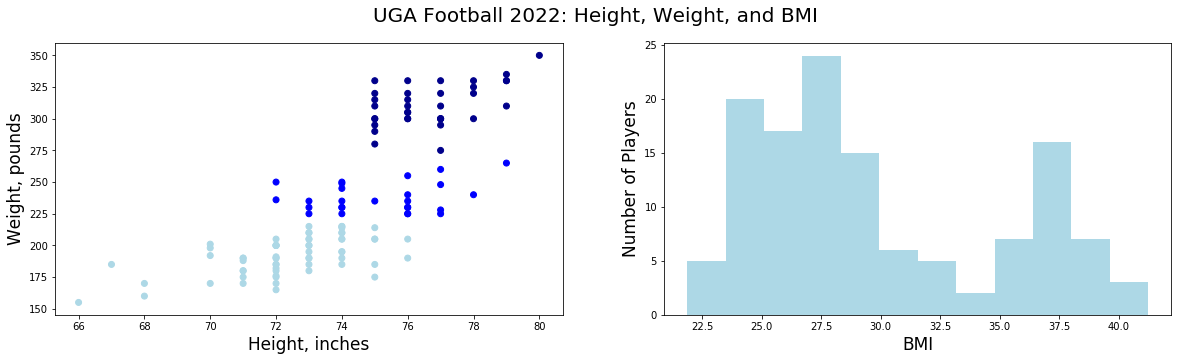

In [14]:
#exclude those with a blank weight class, create new dataset
data2 = data[data['Weight Class'] != 'N/A']

fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey=False)

colors = {'Heavy': 'darkblue', 'Average': 'blue', 'Light':'lightblue'}

#plots
ax[0].scatter(data2['Height, inches'], data2['Weight'], c=data2['Weight Class'].map(colors))
ax[1].hist(data['BMI'], bins = 12, color = 'lightblue')
fig.suptitle('UGA Football 2022: Height, Weight, and BMI', fontsize = 20)

#axis settings
ax[0].set_ylabel('Weight, pounds', fontsize = 17)
ax[0].set_xlabel('Height, inches', fontsize = 17)
ax[1].set_xlabel('BMI', fontsize = 17)
ax[1].set_ylabel('Number of Players', fontsize = 17)


In [15]:
#Heat Map showing height and weight and density of number of players
alt.Chart(data).mark_rect().encode(
    alt.X('Height, inches:Q', bin=alt.Bin(maxbins=15)),
    alt.Y('Weight:Q', bin=alt.Bin(maxbins=15)),
    alt.Color('count():Q', scale=alt.Scale(scheme='blues'))
).configure_rect(binSpacing=1)

alt.Chart(...)

In [16]:
#Number of players by height bins
Height_hist = alt.Chart(data).mark_bar().encode(
    alt.X('Height, inches:Q', bin=alt.Bin(maxbins=15)),
    y='count()'
)

#Number of players by weight bins
Weight_hist = alt.Chart(data).mark_bar().encode(
    alt.X('Weight:Q', bin=alt.Bin(maxbins=15)),
    y='count()'
)

#Height and Weight distributions side by side
Height_hist | Weight_hist

alt.HConcatChart(...)

In [17]:
#Number of players by State
alt.Chart(data).mark_bar().encode(
    alt.X('State:N', sort=alt.EncodingSortField(field='State', op='count', order='descending')),
    alt.Y('count():Q')
)

alt.Chart(...)

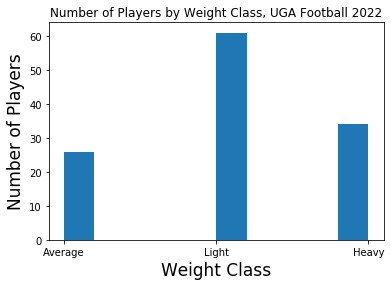

In [18]:
#weight class distribution, exploratory
plt.hist(data2['Weight Class'])
plt.ylabel('Number of Players', fontsize = 17)
plt.xlabel('Weight Class', fontsize = 17)
plt.title('Number of Players by Weight Class, UGA Football 2022')
plt.show()

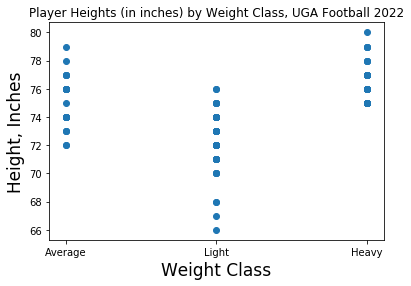

In [19]:
#weight class by height, exploratory
plt.scatter(data2['Weight Class'], data2['Height, inches'])
plt.ylabel('Height, Inches', fontsize = 17)
plt.xlabel('Weight Class', fontsize = 17)
plt.title('Player Heights (in inches) by Weight Class, UGA Football 2022')
plt.show()

In [20]:
#Graveyard:

#weight_classes = ['Light', 'Average', 'Heavy']
#weight_class_rank = [1, 2, 3]
#class_rank_zip = zip(*sorted(zip(weight_class_rank, weight_classes)))
#class_rank_list = list(class_rank_zip)[1]


#print(class_rank_list)



#xticks = [1, 2, 3]
#xlabels = [1, 2, 3]
#plt.xticks(ticks = xticks, labels = xlabels)